In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
class_name = iris.target_names

In [6]:
class_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
features=iris.feature_names

In [8]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

In [10]:
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
#split the dataset to train and test data
from sklearn.model_selection import train_test_split

In [12]:
#features for training 
x=data[['sepal length','sepal width','petal width','petal length']]
y = data['species'] #target label

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25) #25% in testing and 75% in training

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#creating the random forest classifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train) # fit: training the RF model

RandomForestClassifier()

In [16]:
y_pred = forest.predict(x_test)

In [17]:
#model accuracy
y_pred #predicted

array([0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 0])

In [18]:
y_test #testing dataset original

42     0
97     1
11     0
112    2
140    2
22     0
74     1
124    2
15     0
132    2
40     0
90     1
65     1
114    2
63     1
93     1
14     0
82     1
143    2
118    2
37     0
59     1
6      0
49     0
68     1
145    2
88     1
87     1
48     0
58     1
126    2
52     1
51     1
122    2
127    2
120    2
141    2
47     0
Name: species, dtype: int64

In [19]:
from sklearn import metrics
print('Accuracy score : ',metrics.accuracy_score(y_test,y_pred))

Accuracy score :  1.0


In [20]:
from sklearn.tree import export_graphviz

In [21]:
import pydot

In [22]:
tree = forest.estimators_[5]
export_graphviz(tree,out_file='/content/tree5.dot',feature_names=features)

In [23]:
(graph,)=pydot.graph_from_dot_file("/content/tree5.dot")
graph.write_png('/content/tree5.png')

In [24]:
tree = forest.estimators_[10]
export_graphviz(tree,out_file='/content/tree10.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree10.dot")
graph.write_png('/content/tree10.png')


In [25]:
tree = forest.estimators_[15]
export_graphviz(tree,out_file='/content/tree15.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree15.dot")
graph.write_png('/content/tree15.png')


In [26]:
tree = forest.estimators_[20]
export_graphviz(tree,out_file='/content/tree20.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree20.dot")
graph.write_png('/content/tree20.png')


In [27]:
tree = forest.estimators_[25]
export_graphviz(tree,out_file='/content/tree25.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree25.dot")
graph.write_png('/content/tree25.png')


In [28]:
tree = forest.estimators_[30]
export_graphviz(tree,out_file='/content/tree30.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree30.dot")
graph.write_png('/content/tree30.png')


In [29]:
tree = forest.estimators_[35]
export_graphviz(tree,out_file='/content/tree35.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree35.dot")
graph.write_png('/content/tree35.png')


In [30]:
tree = forest.estimators_[40]
export_graphviz(tree,out_file='/content/tree40.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree40.dot")
graph.write_png('/content/tree40.png')


In [31]:
tree = forest.estimators_[17]
export_graphviz(tree,out_file='/content/tree17.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree17.dot")
graph.write_png('/content/tree17.png')


In [32]:
tree = forest.estimators_[21]
export_graphviz(tree,out_file='/content/tree21.dot',feature_names=features)

(graph,)=pydot.graph_from_dot_file("/content/tree21.dot")
graph.write_png('/content/tree21.png')


In [33]:
iris.target_names[forest.predict([[15,5,8,4]])][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


'versicolor'

In [34]:
#finding import feature
feature_imp=pd.Series(forest.feature_importances_,index=features).sort_values(ascending=False)

In [35]:
feature_imp

petal length (cm)    0.440409
petal width (cm)     0.422288
sepal length (cm)    0.109009
sepal width (cm)     0.028295
dtype: float64

In [36]:
import seaborn as sns
%matplotlib inline

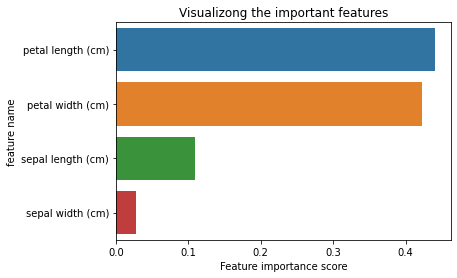

In [37]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Feature importance score")
plt.ylabel("feature name")
plt.title("Visualizong the important features")
plt.show()